In [109]:
import numpy as np
import matplotlib.pyplot as plt
from pylablib.devices import uc480

Frame 0 mean intensity: 94.40747985839843
Frame 1 mean intensity: 90.59317398071289
Frame 2 mean intensity: 88.73768005371093
Frame 3 mean intensity: 88.39662475585938
Frame 4 mean intensity: 83.86944122314453
Frame 5 mean intensity: 74.63015441894531
Frame 6 mean intensity: 57.66848449707031
Frame 7 mean intensity: 47.39285507202148
Frame 8 mean intensity: 42.831486511230466
Frame 9 mean intensity: 41.05440902709961


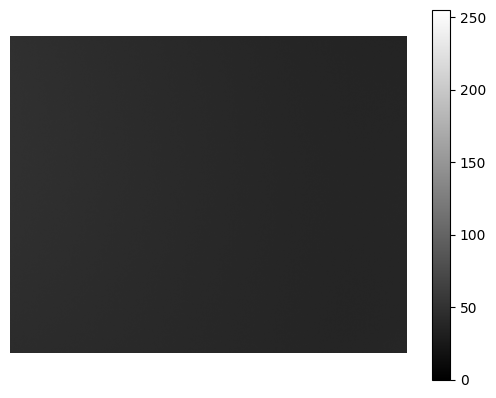

In [126]:
cam = uc480.UC480Camera()       # opens the first available camera
#cam.start_acquisition()
cam.set_color_mode("raw8")
#cam.set_gain(10)  # range is typically 0–100

# 4. Grab a frame via pylablib
for i in range(10):
    frame = cam.grab()[0]
    print("Frame", i, "mean intensity:", frame.mean())

plt.imshow(frame, cmap='gray', vmin=0, vmax=255)   # "gray" ensures proper rendering if it's single-channel
plt.axis("off")
plt.colorbar()
plt.show()

cam.close()

In [86]:
def dump_camera_settings(cam):
    print("Exposure:", cam.get_exposure())
    #print("Gain:", cam.get_gain())
    print("Color mode:", cam.get_color_mode())
    print("ROI:", cam.get_roi())
    print("Binning:", cam.get_binning())
    #print("Pixel size:", cam.get_pixel_size())
    #print("Temperature:", cam.get_temperature())

dump_camera_settings(cam)

Exposure: 0.0009986666666666668
Color mode: rgb8p
ROI: (0, 1280, 0, 1024, 1, 1)
Binning: (1, 1)


In [98]:
cam.close()

## test 2

InitCamera returned: 3 Handle: 0
Frame 0 mean intensity: 1.3194351196289062
Frame 1 mean intensity: 254.9999885559082
Frame 2 mean intensity: 254.9999786376953
Frame 3 mean intensity: 254.99998728434244
Frame 4 mean intensity: 254.999986521403
Frame 5 mean intensity: 254.99998626708984
Frame 6 mean intensity: 254.9999885559082
Frame 7 mean intensity: 254.99998296101887
Frame 8 mean intensity: 254.99998881022137
Frame 9 mean intensity: 254.99999389648437
Frame 10 mean intensity: 254.99999262491863
Frame 11 mean intensity: 254.99999084472657
Frame 12 mean intensity: 254.99998830159504
Frame 13 mean intensity: 254.99998982747397
Frame 14 mean intensity: 254.99999287923177
Frame 15 mean intensity: 254.9999870300293
Frame 16 mean intensity: 254.99997634887694
Frame 17 mean intensity: 254.99998575846354
Frame 18 mean intensity: 254.99999186197917
Frame 19 mean intensity: 254.99999033610027


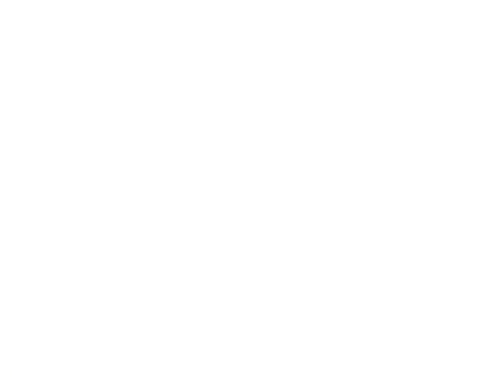

1

In [91]:
import ctypes
import matplotlib.pyplot as plt
from pylablib.devices import uc480

# 1. Open camera via pylablib (for frame grabbing)
cam = uc480.UC480Camera()

# 2. Also open DLL directly
uc480 = ctypes.windll.LoadLibrary("uc480_64.dll")

# Camera ID 0 = first camera
HIDS = ctypes.c_int(0)

# Init camera (this gives us the handle)
ret = uc480.is_InitCamera(ctypes.byref(HIDS), None)
print("InitCamera returned:", ret, "Handle:", HIDS.value)

# 3. Enable auto-gain and auto-exposure
IS_SET_ENABLE_AUTO_GAIN = 0x8000
IS_SET_ENABLE_AUTO_SHUTTER = 0x8001

val = ctypes.c_double(1.0)

uc480.is_SetAutoParameter(HIDS, IS_SET_ENABLE_AUTO_GAIN,
                          ctypes.byref(val), None)
uc480.is_SetAutoParameter(HIDS, IS_SET_ENABLE_AUTO_SHUTTER,
                          ctypes.byref(val), None)




plt.imshow(frame)
plt.axis("off")
plt.show()

# 5. Cleanup
cam.close()
uc480.is_ExitCamera(HIDS)


In [169]:
import numpy as np

data = np.load("../data/beam_dataset.npz")
frames = data["frames"]        # shape (N, H, W)
x_offset_arr = data["x_offset_arr"]  # length N
y_offset_arr = data["y_offset_arr"]  # length N


In [170]:
print(x_offset_arr)
print(y_offset_arr)

[-10 -10 -10   0   0   0  10  10  10]
[-10   0  10 -10   0  10 -10   0  10]


In [177]:
print(np.where((y_offset_arr == 10) & (x_offset_arr == 0))[0][0])

5


In [178]:
# find a specific offset
target_x = 10
target_y = 0
idx = np.where((x_offset_arr == target_x) & (y_offset_arr == target_y))[0][0]
frame = frames[idx]


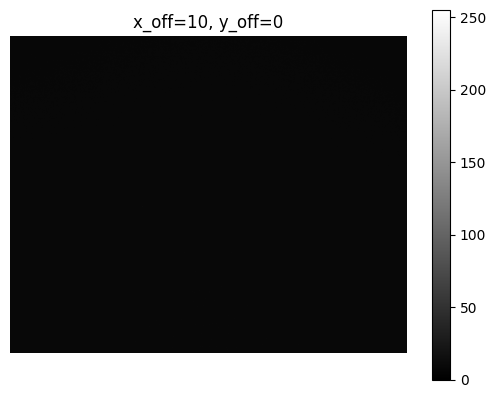

In [184]:
import matplotlib.pyplot as plt

plt.imshow(frame, cmap="gray", vmin = 0, vmax = 255)
plt.title(f"x_off={target_x}, y_off={target_y}")
plt.axis('off')
plt.colorbar()
plt.show()
